In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA To Prediction (DieTanic)

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.available : matplotlib에서 사용할 수 있는 스타일 시트 목록 출력
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('../input/titanic/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The __Age, Cabin, Embarked__ have null values.

## How many Survived?

__생존자와 사망자의 수, 비율을 시각화 해보기__
- 0 : 사망자
- 1 : 생존자

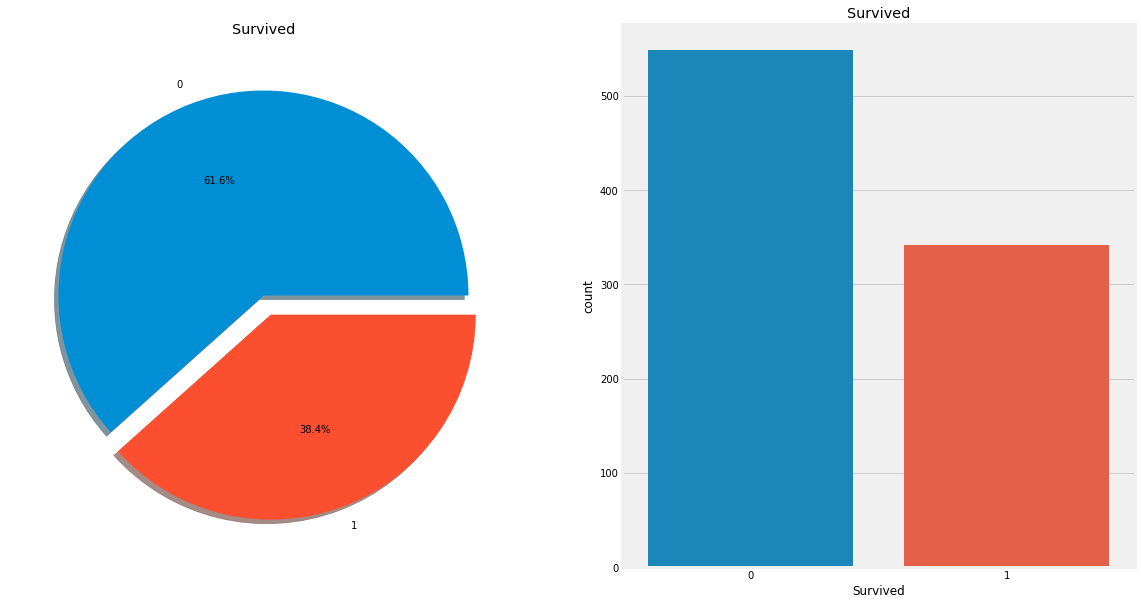

In [7]:
f,ax = plt.subplots(1,2, figsize=(18,10))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', shadow=True, ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data=df, x='Survived', ax=ax[1])
ax[1].set_title('Survived')

'''
matplotlib을 활용하여 동일한 그래프 그리기
colors = ['tab:blue', 'tab:red']
df['Survived'].value_counts().plot.bar(color=colors, ax=ax[1])
plt.xticks(rotation=0)
ax[1].set_title('Survived')
'''

plt.show()

__Reference__
- 1st graph
  - [pandas.DataFrame.plot.pie()]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html?highlight=plot%20pie#pandas.DataFrame.plot.pie')  
  - [matplotlib.pyplot.pie()]('https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html')
  - [matplotlib 파이 차트 그리기]('https://wikidocs.net/92114')
  
  - [Can we have Seaborn pie charts?]('https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/')
- 2nd graph
  - [matplotlib: list of named colors]('https://matplotlib.org/3.2.1/gallery/color/named_colors.html')
  - [matplotlib: colormap reference]('https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html')
  
  - [matplotlib 바 차트 꾸미기]('https://zephyrus1111.tistory.com/9')
  - [matplotlib x축 눈금 레이어 텍스트 회전 방법]('https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/')

__Thinking__
- pie chart를 seaborn를 이용해 시각화 할 수 있을까?
- 생존자 숫자를 seaborn countplot이 아닌 barplot 시각화 할수는 없을까?

## Type of Features

__Categorical Features__ 
  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.   
For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables.  
They are also known as Nominal Variables.  
  
__Categorical Features in the dataset: Sex, Embarked__

__Ordinal Features__  
  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values.  
For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. 
Here we can have a relative sort in the variable.

__Ordinal Features in the dataset: Pclass__

__Continous Features__  
  
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.  
  
__Continous Features in the dataset: Age__

## Analysing The Features

### Sex (categoical feature)

In [8]:
# df.groupby(['Sex', 'Survived'])['Survived'].count()
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

__Observation:__  
- __전체 남성 승객__ 의 수가 여성 승객의 수보다 __2배__ 가까이 많은 반면에, __생존자의 숫자__ 는 __여성 승객이__ 남성 승객보다 __2배 이상__ 많다.

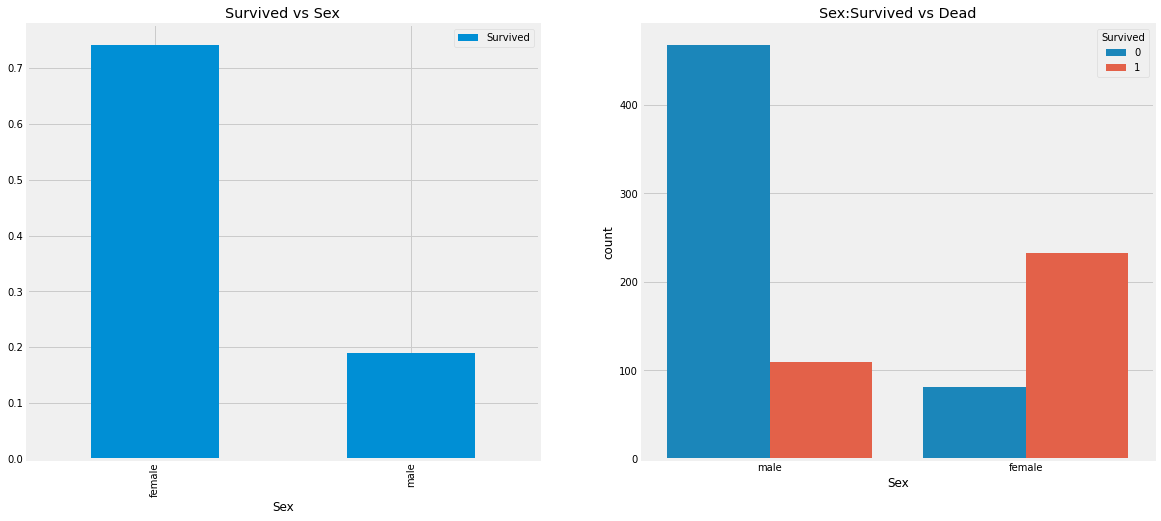

In [9]:
f,ax = plt.subplots(1,2, figsize=(18,8))

df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # 사망자, 생존자 비율
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

__Observation:__  
- 생존율은 여성 승객이 대략 75%인 반면 남성 승객은 20%도 안된다.

### Pclass (Ordinal Feature)

In [10]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


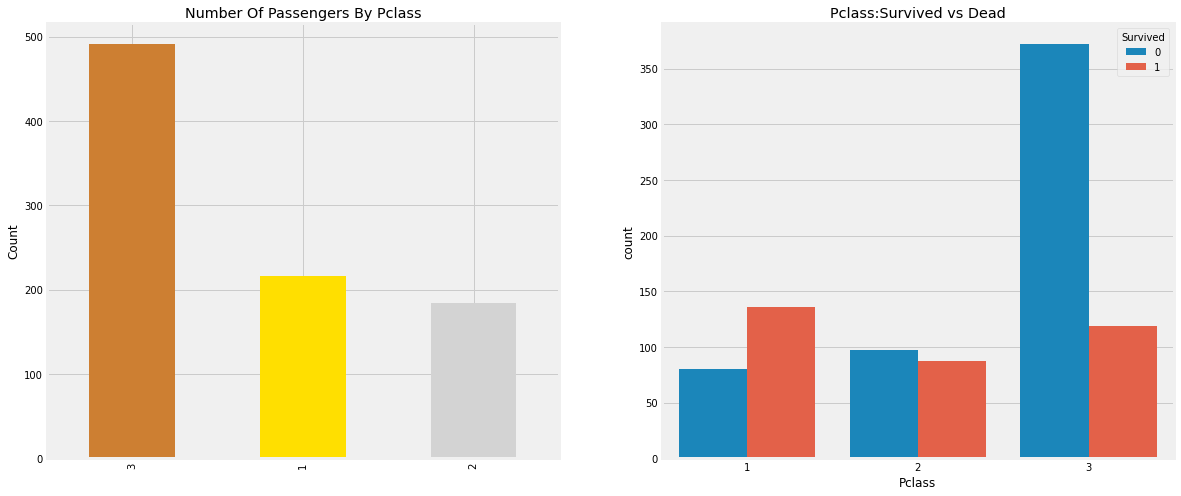

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

- [style.background_gradient()]('https://data-rider.blogspot.com/2015/11/pandas-style.html')

In [12]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

# # pd.pivot_table() 로 동일하게 표한히기
# pd.pivot_table(df, index=['Sex', 'Survived'], columns=['Pclass'], values=['PassengerId'], aggfunc='count', margins=True).style.background_gradient(cmap='summer_r')
# df.pivot_table(index=['Sex','Survived'], columns=['Pclass'], values=['PassengerId'], aggfunc='count', margins=True).style.background_gradient(cmap='summer_r')

# pd.style.background_gradient()

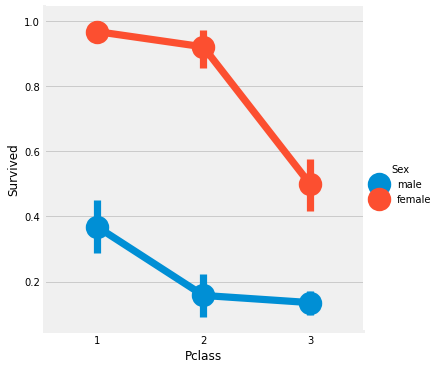

In [13]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.show()

__Observation:__
- 성별에 관계 없이 1등급 객실 생존자가 가장 많다.
- 심지어 1등급 객실의 여성 생존자의 비율은 거의 100%에 가깝다.
- 3등급 객실의 남성 생존율이 가장 낮다

### Age (continous feature)

In [14]:
# 최고령자, 최연소자, 평균 연령 확인
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on the ship:',df['Age'].mean(),'Years') #? float 반올림 가능 여부

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


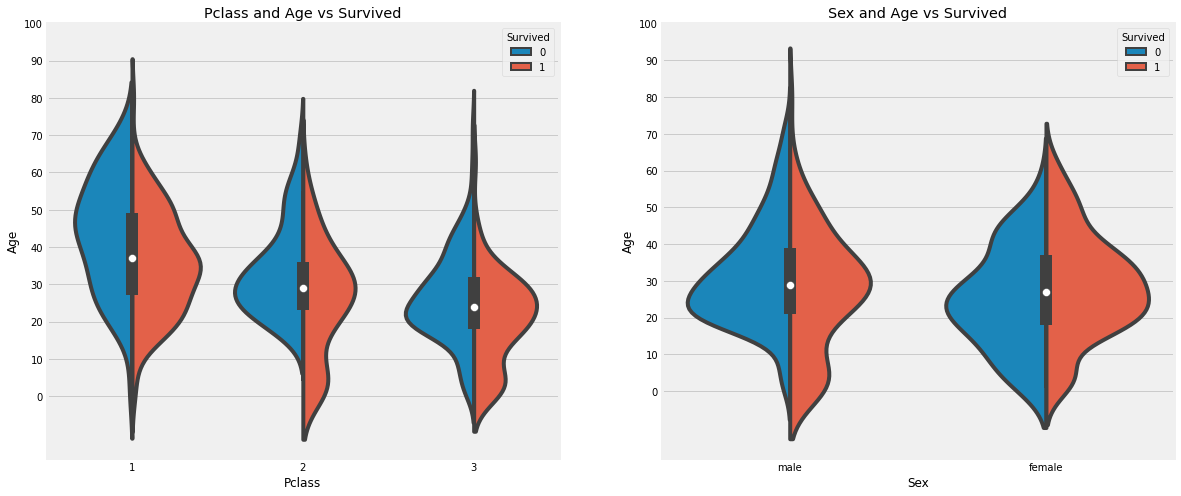

In [15]:
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True, ax=ax[0])  # split=True : hue값에 대한 2개의 그룹을 하나에 violin에 그릴 수 있다.
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(data=df, x="Sex", y="Age", hue="Survived", split=True, ax=ax[1])  # matplotlib을 활용해서 violinplot을 그릴 수 있다. (ax.violinplot)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

__Observations:__  
1. 객실 등급 : 1등급 객실의 30~40대 생존자가 가장 많아 보인다.
2. 성별 : 30대 남성과 여성의 생존자가 많다.
3. 남성의 경우, 나이가 증가할 수록 생존 기회가 줄어든다.

In [16]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')  # Mr, Mrs 등 추출(정규 표현식)

In [17]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')
# pd.crosstab(df.Sex, df.Initial).style.background_gradient(cmap='summer_r')
# df.pivot_table(index=['Sex'], columns=['Initial'], values=['PassengerId'], aggfunc='count', fill_value=0).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
# Initial 전처리
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
df.groupby('Initial')['Age'].mean()  # Initial 별 평균 연령 체크

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

__Filling NaN Ages__

In [20]:
# Age가 Null값인 경우 Initial 변수의 value 평균으로 대체
df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age'] = 46

In [21]:
# Age Null값 여부 재확인
df.Age.isnull().any()  # any : Null값이 있으면 True, 없으면 False 반환

False

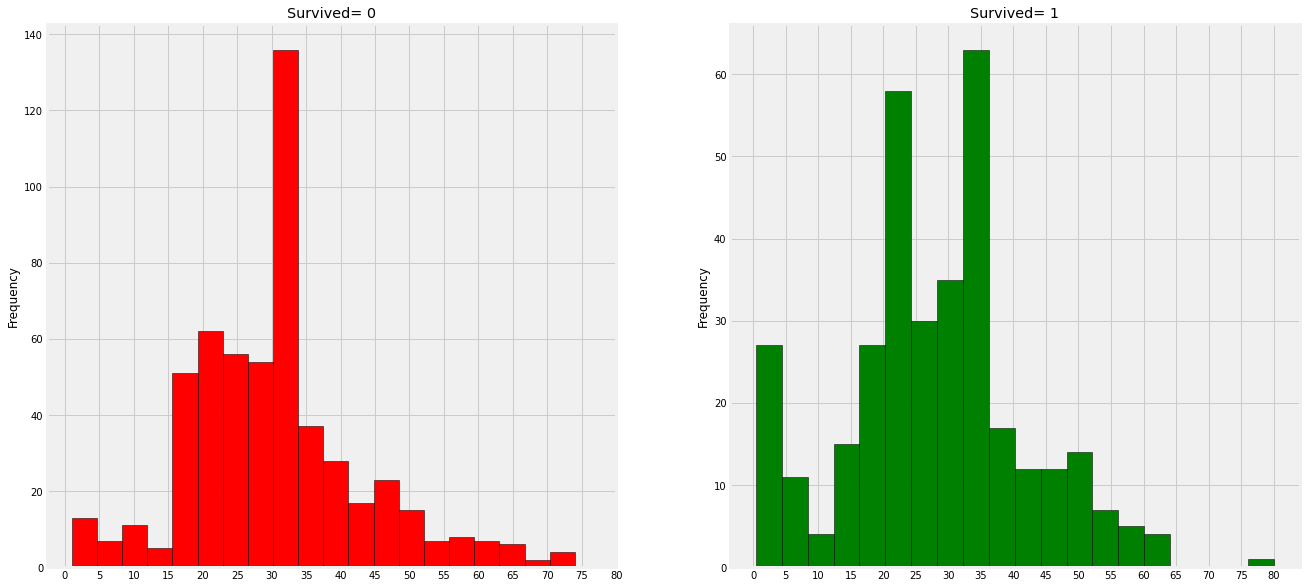

In [22]:
f,ax = plt.subplots(1,2,figsize=(20,10))

df[df['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, color='red', edgecolor='black')  # bins : 그래프의 개수
ax[0].set_title('Survived= 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='green', edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

__Observation:__  
- 5세 미만 아동의 생존자 숫자가 많다. (Women and Child First 정책 영향)
- 가장 나이가 많은 승객(80세)이 생존하였다. 
- 30~40세 사이의 승객이 가장 많이 사망하였다.

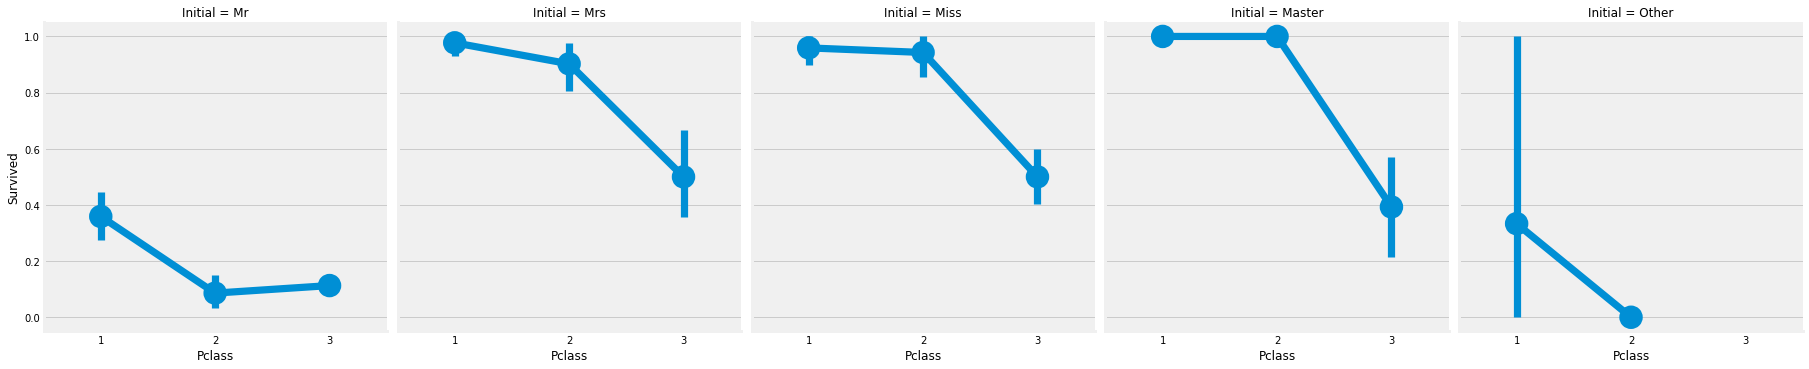

In [23]:
sns.factorplot(data=df, x='Pclass', y='Survived', col='Initial')
plt.show()

__Observation:__  
- 여성과 아이 우선 정책에 따라 Mr, Other보다 Mrs, Miss, Master의 생존율이 높다

### Embarked (categorical value)
1. C : Cherbourg 
2. Q : Queenstown 
3. S : Southampton

In [24]:
pd.crosstab([df.Embarked, df.Pclass], [df.Sex, df.Survived], margins=True).style.background_gradient(cmap='summer_r')

__Chances for Survival by Port Of Embarkation__

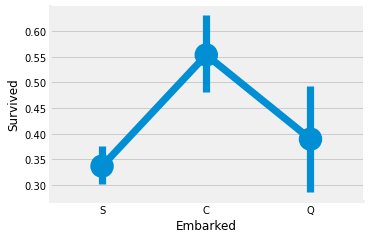

In [25]:
sns.factorplot(data=df, x='Embarked', y='Survived')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# 다른 시각화 방법(에러 발생 - 'AxesSubplot' object is not subscriptable)
# f,ax = plt.subplots(1,1, figsize=(5,3))
# sns.factorplot(data=df, x='Embarked', y='Survived', ax=ax[0])
# plt.show()

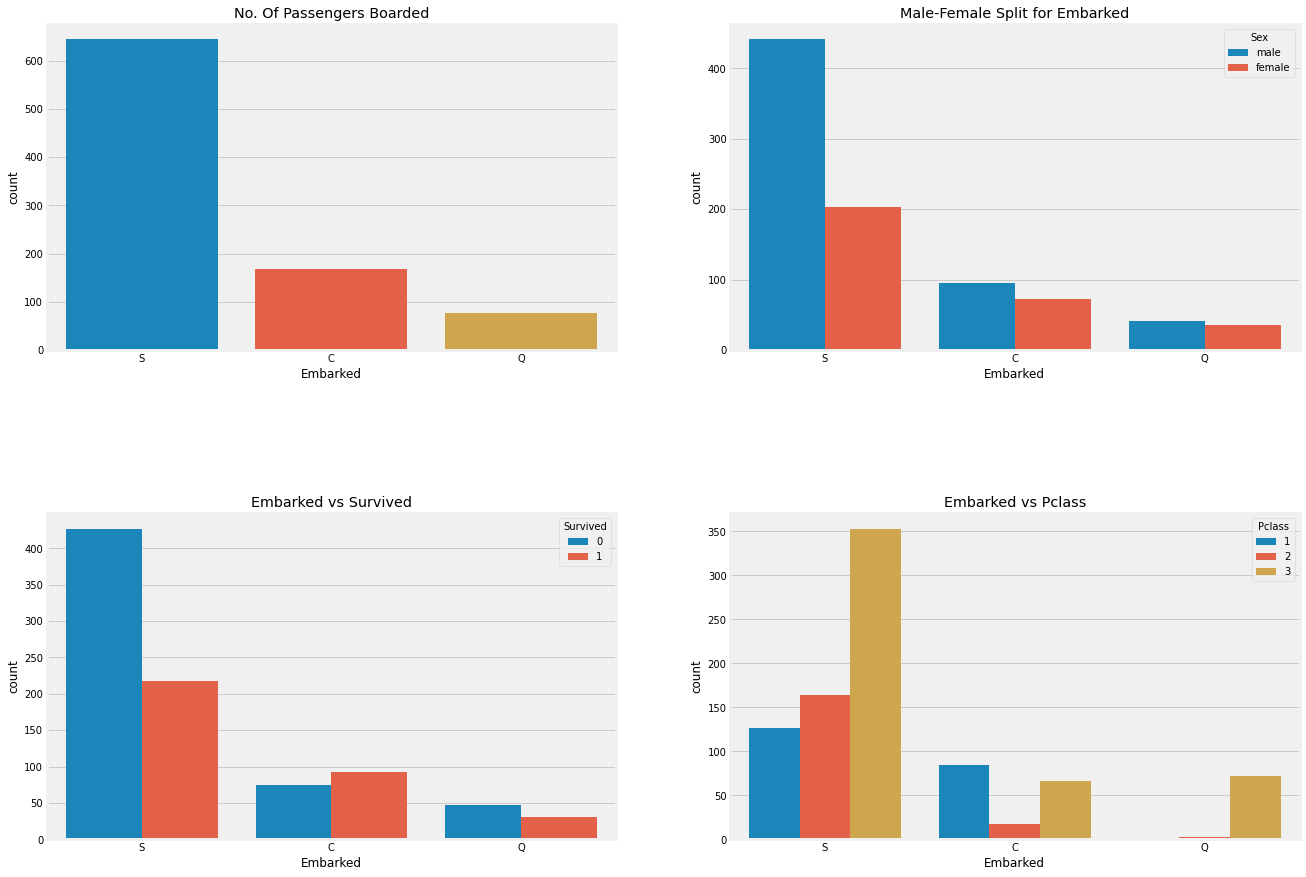

In [26]:
f,ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot(data=df, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)  # plt.subplots_adjust() 서브플롯 간의 간격 조절
plt.show()

- [Matplotlib] subplot 간격 조절(https://steadiness-193.tistory.com/174)

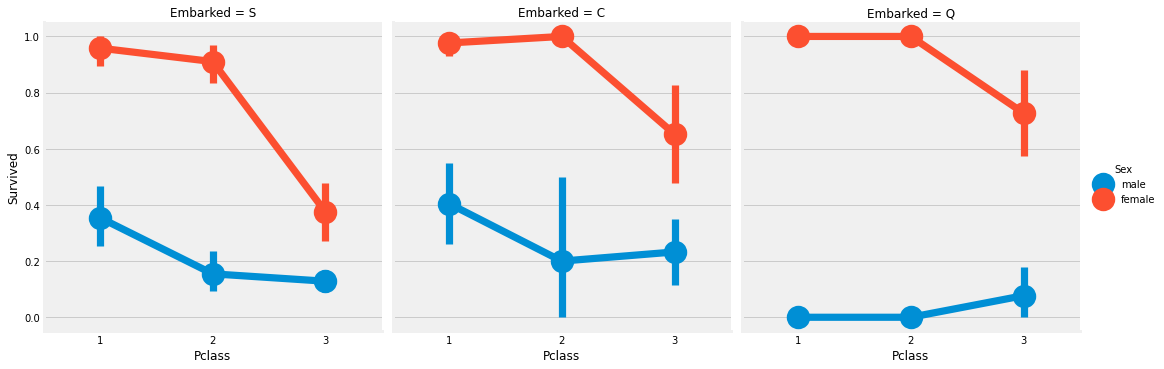

In [27]:
sns.factorplot(data=df, x='Pclass', y='Survived', hue='Sex', col='Embarked')
plt.show()

__Filling Embarked NaN__

In [28]:
df['Embarked'].isnull().sum()

2

In [29]:
df['Embarked'].fillna('S', inplace=True)

In [30]:
df['Embarked'].isnull().any()

False

### SibSip (discrete feature)
1. Sib : Sibling(형제자매)
2. Sp : Spouse(배우자)

In [31]:
pd.crosstab(df.SibSp, df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


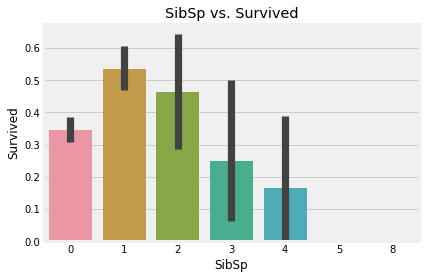

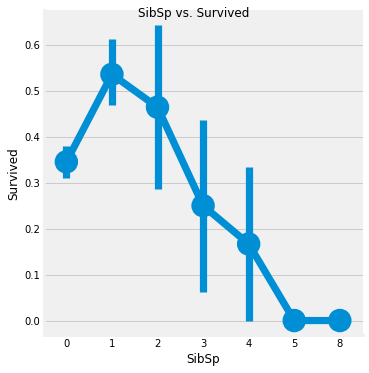

In [32]:
f = sns.barplot(data=df, x="SibSp", y="Survived")
f.set_title("SibSp vs. Survived")

f = sns.factorplot(data=df, x="SibSp", y="Survived")
f.fig.suptitle("SibSp vs. Survived")

plt.show()

In [33]:
pd.crosstab(df.SibSp, df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

부모와 자식이 있는 승객(Parch)에 대한 데이터 분석을 해본다.

In [34]:
pd.crosstab(df["Parch"], df["Pclass"]).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


__Observation:__
- 부모와 자식이 없는 승객 중 3등급 객실의 승객수가 제일 많다.
- 부모와 자식이 있는 승객도 상대적으로 3등급 객실에 많이 탔다.

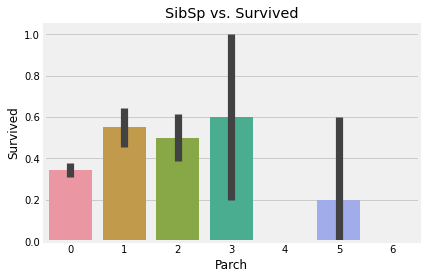

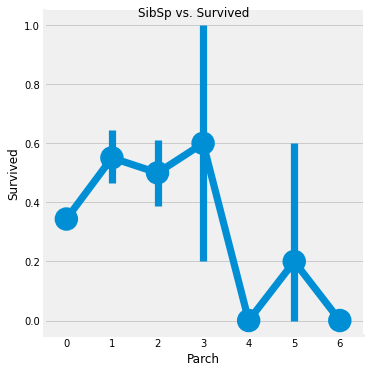

In [35]:
f = sns.barplot(data=df, x="Parch", y="Survived")
f.set_title("SibSp vs. Survived")

f = sns.factorplot(data=df, x="Parch", y="Survived")
f.fig.suptitle("SibSp vs. Survived")

plt.show()

### Fare (Continous Feature)

In [36]:
# 티켓요금(Max, Min, Mean)
print('Highest Fare was:',df['Fare'].max())
print('Lowest Fare was:',df['Fare'].min())
print('Average Fare was:',df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


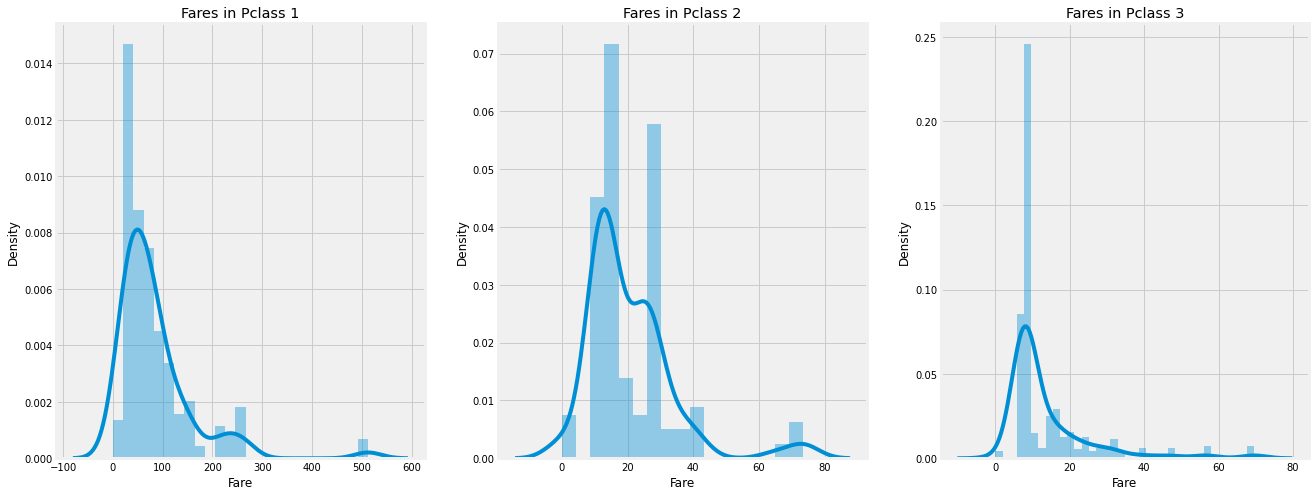

In [37]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(df[df['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(df[df['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(df[df['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

__Observation:__
- 객실별 평균 티켓 비용을 분석해본다.
- 1등급 객실 : 약 75불
- 2등급 객실 : 10~20불 사이
- 3등급 객실 : 10불 미만

### Correlation Between The Features

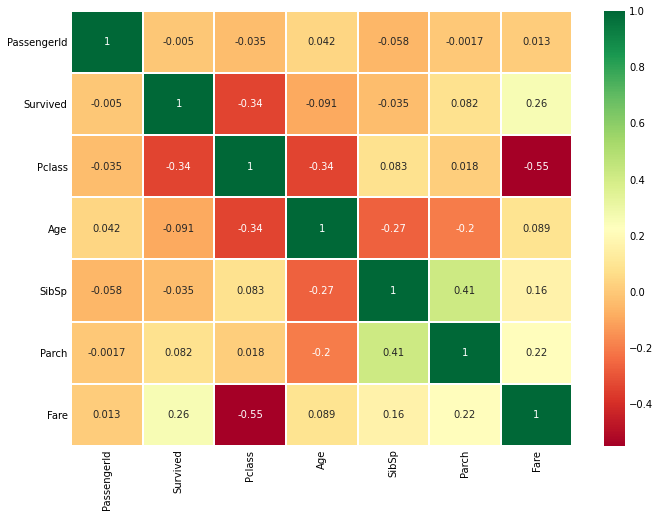

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)  # df.corr() : correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Part2: Feature Engineering and Data Cleaning

### Age_band

In [39]:
df['Age_band'] = 0
df.loc[df['Age'] <= 16, 'Age_band'] = 0
df.loc[(df['Age'] > 16)&(df['Age'] <= 32), 'Age_band'] = 1
df.loc[(df['Age'] > 32)&(df['Age'] <= 48), 'Age_band'] = 2
df.loc[(df['Age'] > 48)&(df['Age'] <= 64), 'Age_band'] = 3
df.loc[df['Age'] > 64, 'Age_band'] = 4
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,0


In [40]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')  # checking the number of passenegers in each band
# df['Age_band'].value_counts().to_frame().sort_index(ascending=True).style.background_gradient(cmap='summer')  # index 별 정렬

,Age_band
1,382
2,325
0,104
3,69
4,11


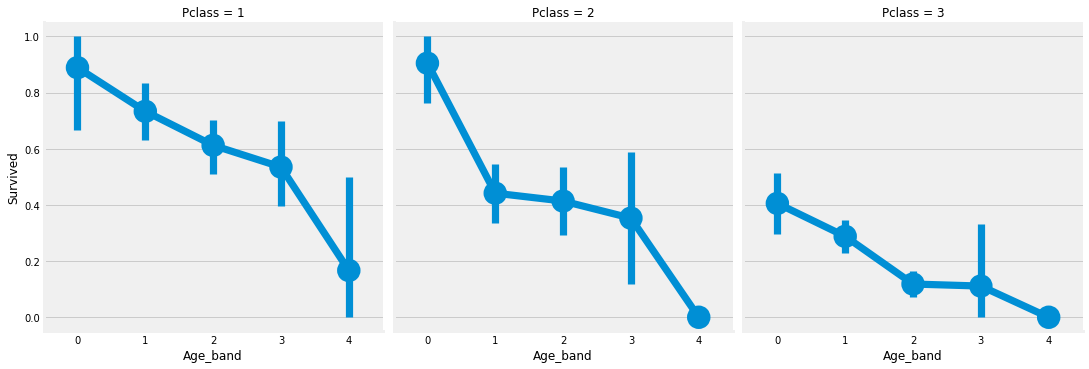

In [41]:
sns.factorplot(data=df, x='Age_band', y='Survived', col='Pclass')

### Family_Size and Alone

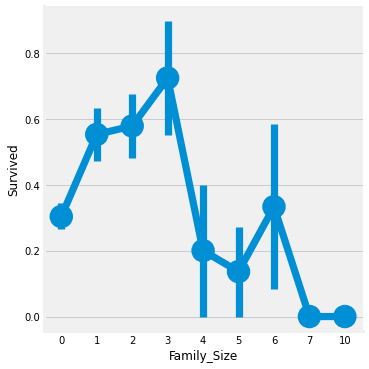

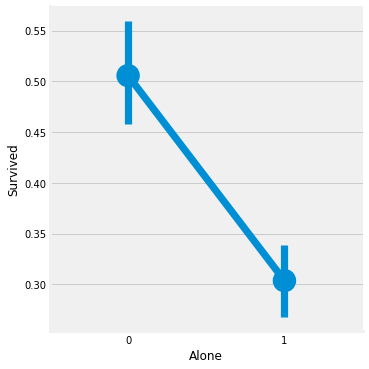

In [42]:
df['Family_Size'] = 0
df['Family_Size'] = df['Parch'] + df['SibSp']  # family size
df['Alone'] = 0
df.loc[df['Family_Size'] == 0, 'Alone'] = 1 # Alon

# f,ax = plt.subplots(1,2, figsize=(18,6))
sns.factorplot(data=df, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot(data=df, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')

# plt.close(2)
# plt.close(3)
plt.show()

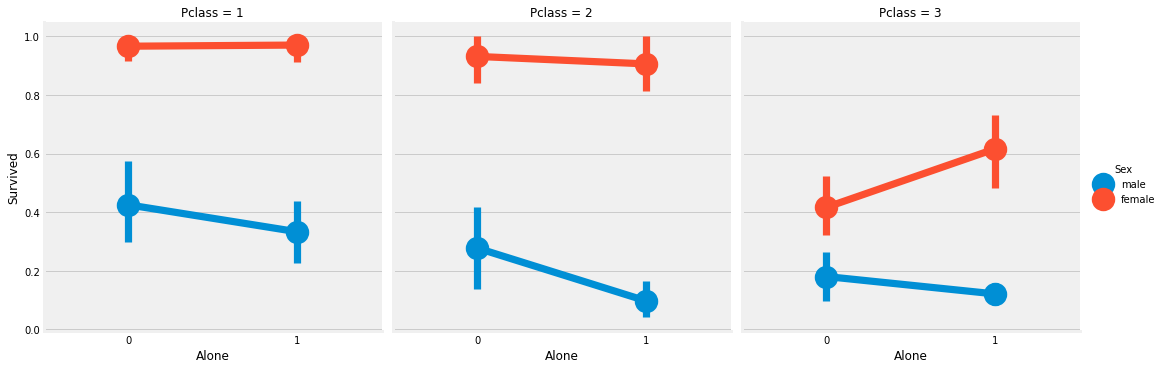

In [43]:
sns.factorplot(data=df, x='Alone', y='Survived', hue='Sex', col='Pclass')
plt.show()

### Fare_Range

In [44]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
df.groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [45]:
df['Fare_cat'] = 0
df.loc[df['Fare'] <= 7.91, 'Fare_cat'] = 0
df.loc[(df['Fare'] > 7.91)&(df['Fare'] <= 14.454), 'Fare_cat'] = 1
df.loc[(df['Fare'] > 14.454)&(df['Fare'] <= 31.0), 'Fare_cat'] = 2
df.loc[(df['Fare'] > 31.0)&(df['Fare'] <= 512.329), 'Fare_cat'] = 3

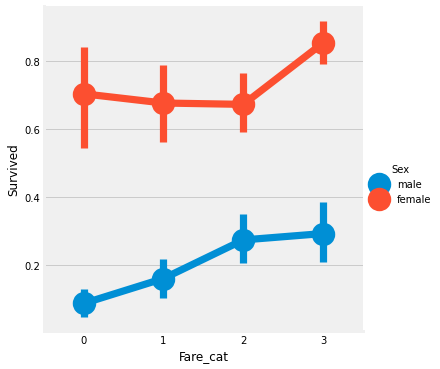

In [46]:
sns.factorplot(data=df, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

### Converting String Values into Numeric

In [47]:
df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
df['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

__Dropping UnNeeded Features__

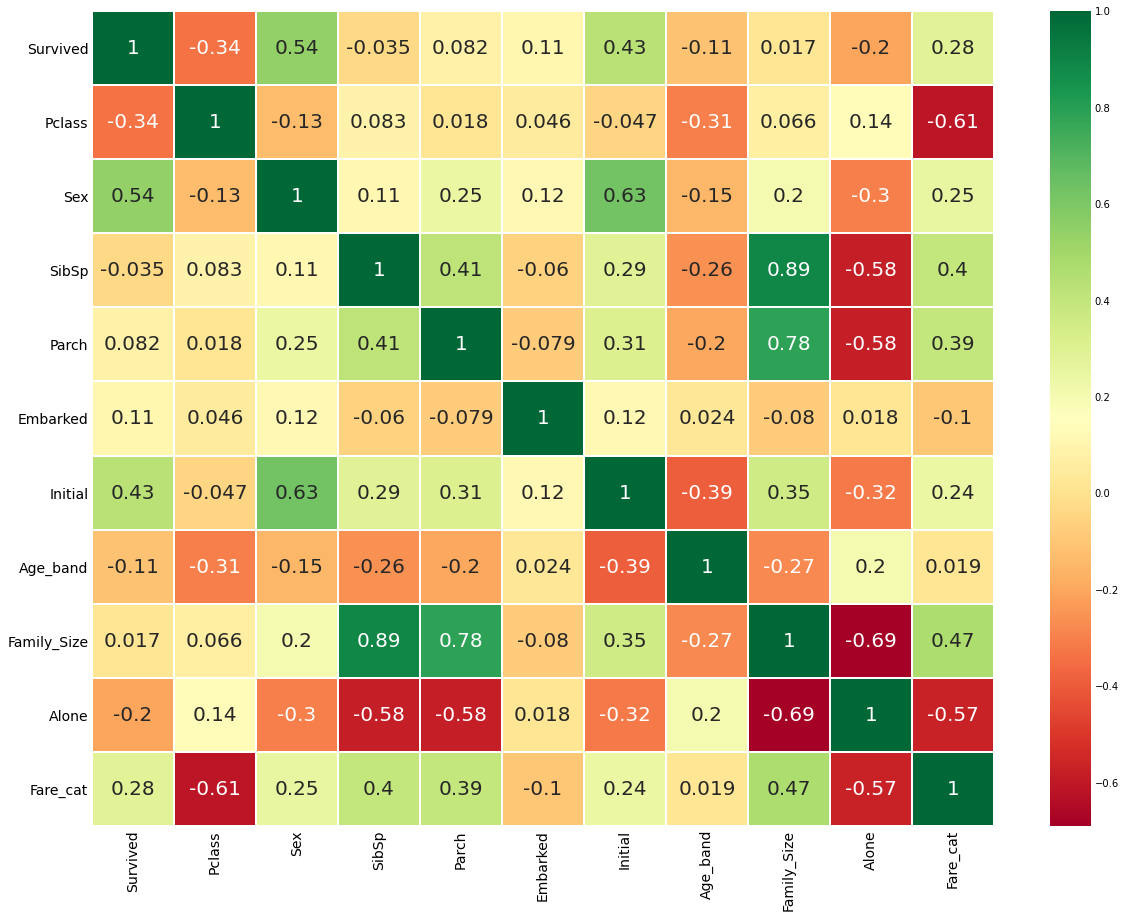

In [48]:
df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part3: Predictive Modeling
1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbours

5) Naive Bayes

6) Decision Tree

7) Logistic Regression

In [49]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.model_selection import train_test_split  # training and testing data split
from sklearn import metrics  # accuarcy measure
from sklearn.metrics import confusion_matrix  # for confusion matrix

In [50]:
train, test = train_test_split(df, test_size=0.3, random_state=0, stratify=df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = df[df.columns[1:]]
Y = df['Survived']

__Radial Support Vector Machines(rbf-SVM)__

In [51]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


__Linear Support Vector Machine(linear-SVM)__

In [52]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


__Logistsic Regression__

In [53]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8208955223880597


__Decision Tree__

In [54]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


__K-Nearest Neighbours(KNN)__

In [55]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8283582089552238


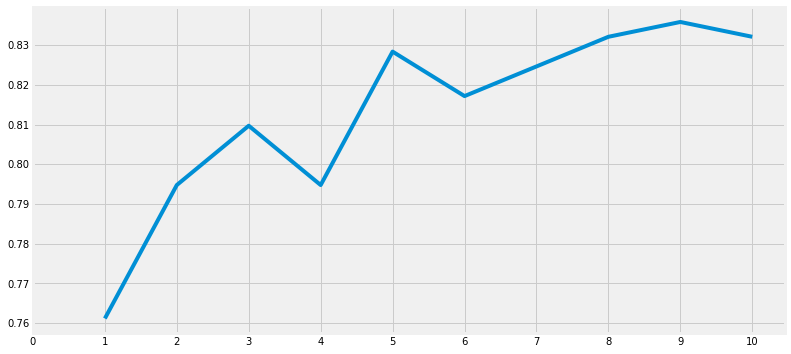

Accuracies for different values of n are: [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955] with the max values as 0.835820895522388


In [56]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max values as', a.values.max())

__Gaussian Naive Bayes__

In [57]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaviveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaviveBayes is 0.8134328358208955


__Random Forests__

In [58]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8097014925373134


### Cross Validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold,scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.812659,0.041477
Decision Tree,0.813758,0.036549
Naive Bayes,0.799139,0.028757
Random Forest,0.812572,0.033335


<AxesSubplot:>

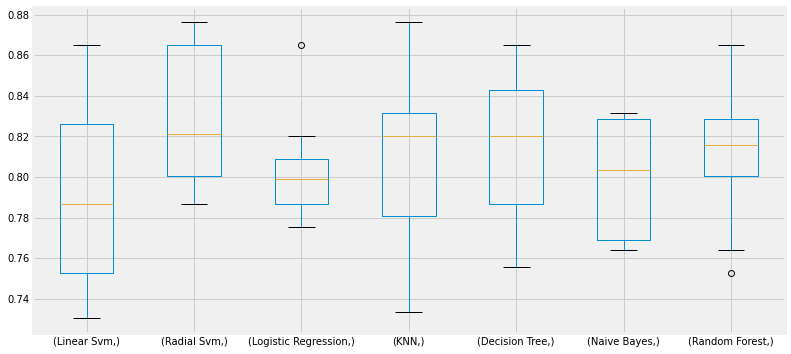

In [60]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

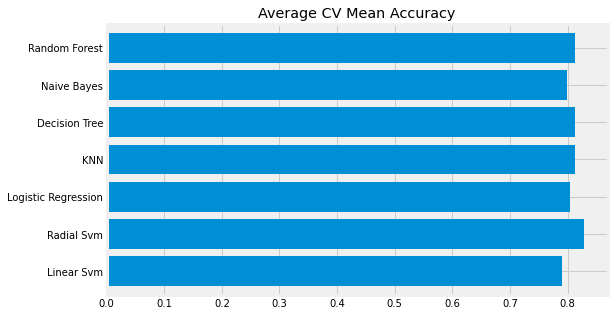

In [61]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

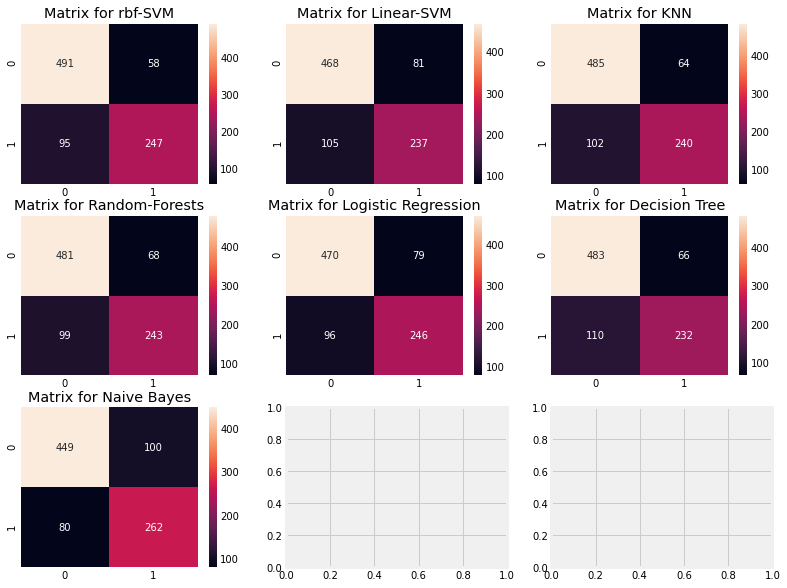

In [62]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

__Hyper-Parameters Tuning__

__SVM__

In [63]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.6, gamma=0.1)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   25.0s finished


__Random Forests__

In [64]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   50.4s finished


0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


### Ensembling

### Voting Classifier

In [65]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                              ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                              ('LR', LogisticRegression(C=0.05)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', svm.SVC(kernel='linear', probability=True))],
                                  voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8237952559300874


### Bagging

__Bagged KNN__

In [66]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8171660424469414


__Bagged DecisionTree__

In [67]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is: 0.8160174781523096


### Boosting

__AdaBoost(Adaptive Boosting)__

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBosst is:', result.mean())

The cross validated score for AdaBosst is: 0.8271660424469414


__Stochastic Gradient Boosting__

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8137827715355804


__XGBoost__

In [70]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

[10:30:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:30:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:30:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:30:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

__Hyper-Parameter Tuning for AdaBoost__

In [73]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 11.5min finished


0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


__Confusion Matrix for the Best Model__

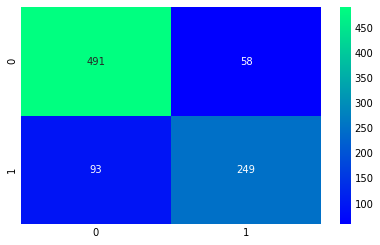

In [74]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[11:03:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


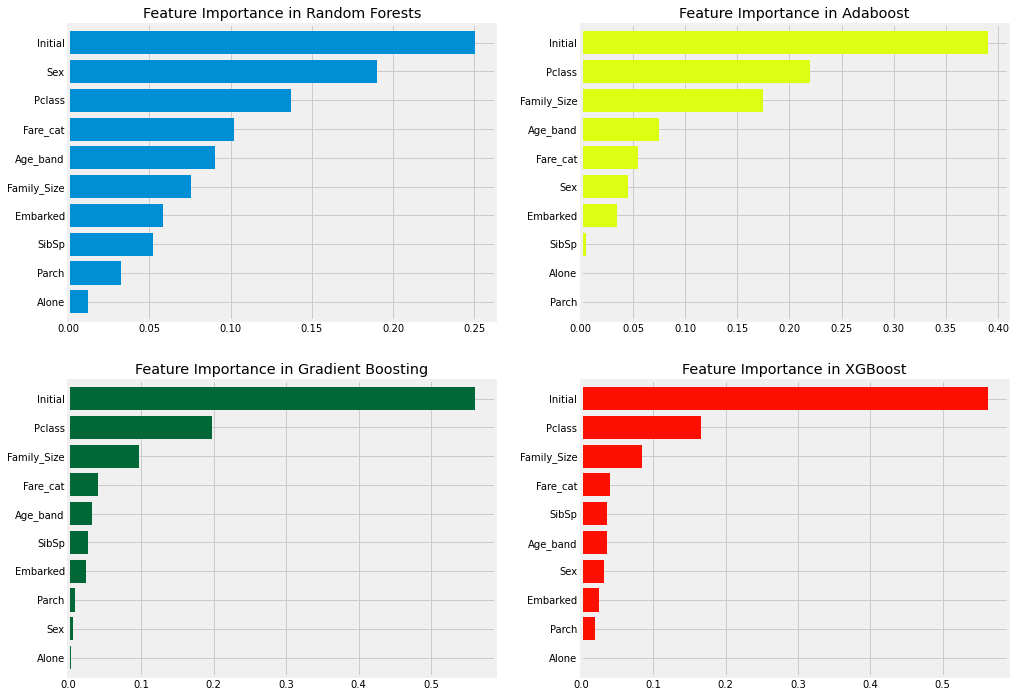

In [75]:
f,ax = plt.subplots(2,2, figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in Adaboost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XGBoost')
plt.show()